# Getting started with images
- Reading an image
- Check image attributes like datatype and shape
- Matrix representation of an image in Numpy
- Color images and splitting/merging image channels
- DIsplay images using matplotlib
- Saving images

# Import libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

# Display image directly

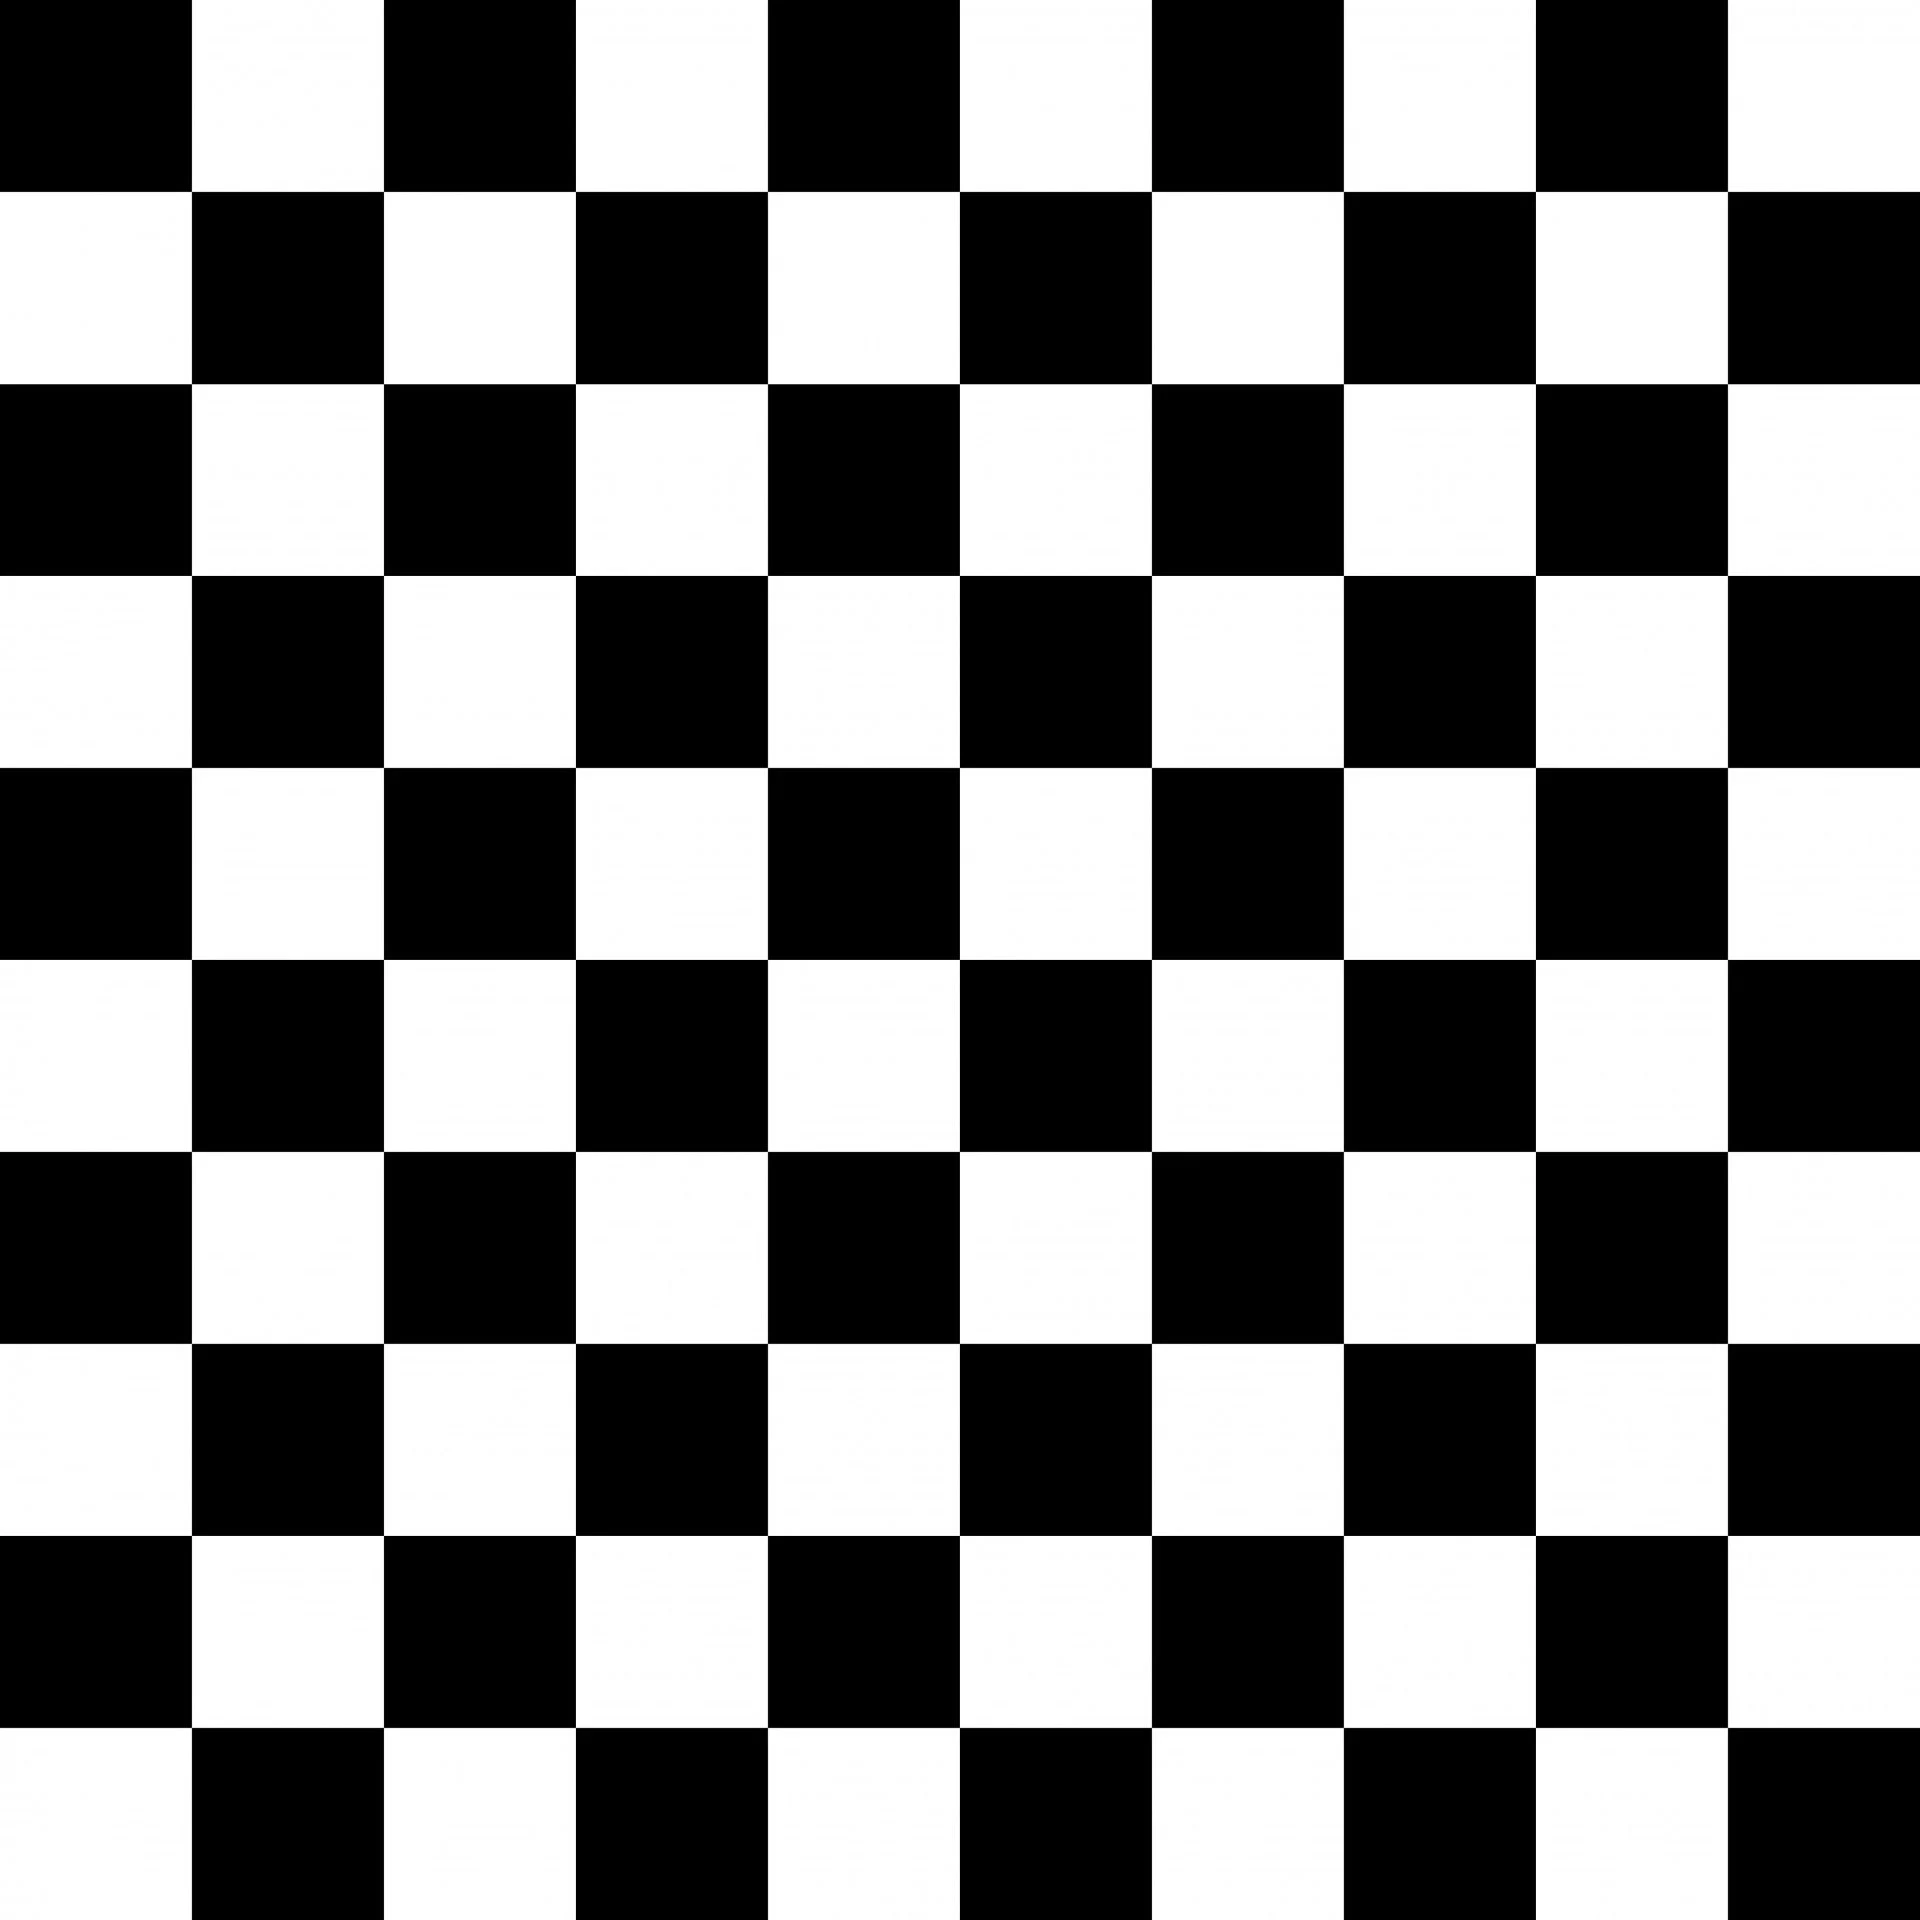

In [3]:
Image(filename='1.png')

# Reading images using OpenCV

In [4]:
## Read image into gray scale
img1 = cv2.imread("1.png", 0)
print(img1)

[[  0   0   0 ... 254 254 254]
 [  0   0   0 ... 254 254 254]
 [  0   0   0 ... 254 254 254]
 ...
 [254 254 254 ...   0   0   0]
 [254 254 254 ...   0   0   0]
 [254 254 254 ...   0   0   0]]


# Display image attributes

In [5]:
#print the size of the image
print("image size is:", img1.shape)

#print data type of the image
print("Data type of the image is:", img1.dtype)

image size is: (1920, 1920)
Data type of the image is: uint8


# Display images using matplotlib

plt.imshow(img)

## What happened?
matplotlib uses a different color map, we need to set the color map

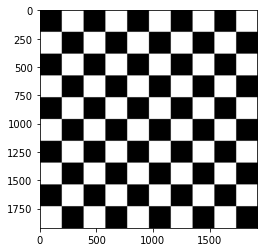

In [6]:
plt.imshow(img1, cmap='gray')

# Working with color images

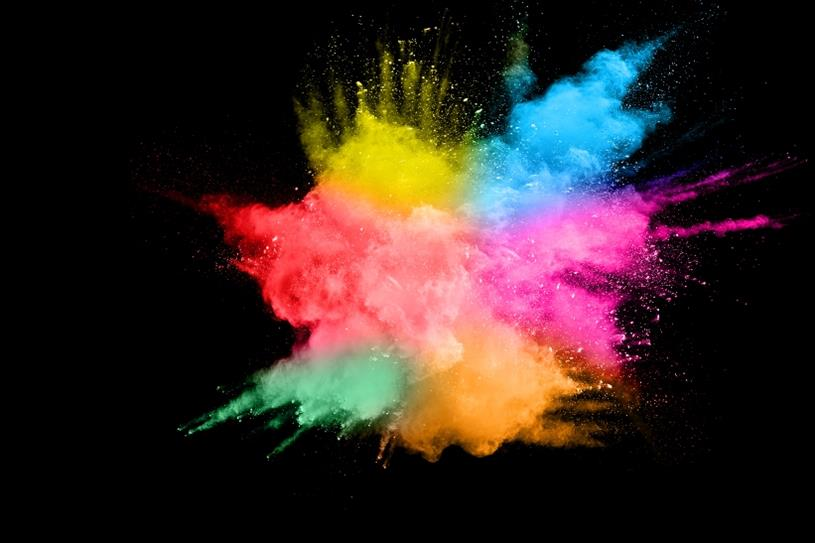

In [7]:
#read the image using Image
Image("2.png")

# Read color images using opencv

In [8]:
img2 = cv2.imread("2.png", 1)
print(img2)
print("The shape of the iamge is:", img2.shape)
print("The data type of the image is:", img2.dtype)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
The shape of the iamge is: (543, 815, 3)
The data type of the image is: uint8


# Display the image

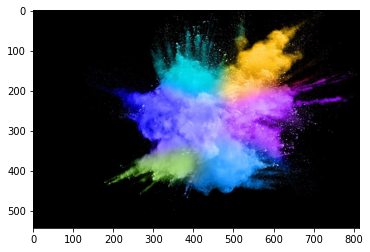

In [9]:
#matplotlib uses a color format BGR rather than RGB
plt.imshow(img2)

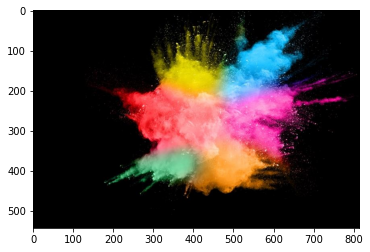

In [10]:
#let's swap the order of the channels
img2_reversed = img2[:, :, ::-1]
plt.imshow(img2_reversed)

# Splitting and merging color channels

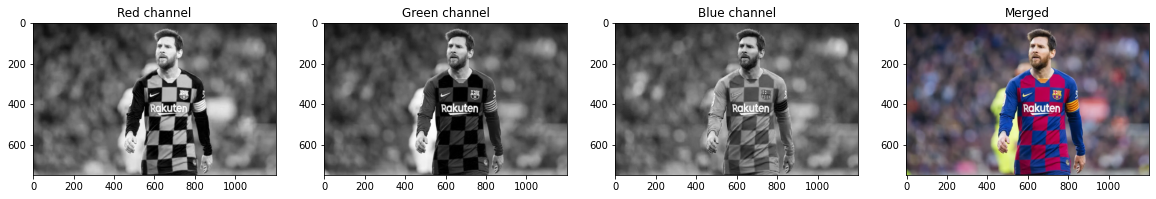

In [11]:
#split the image into B,G,R components
img3 = cv2.imread("3.png", cv2.IMREAD_COLOR)
b, g, r = cv2.split(img3)

#show the channels
plt.figure(figsize=(20,5))
plt.subplot(141); plt.imshow(r, cmap='gray'); plt.title("Red channel");
plt.subplot(142); plt.imshow(g, cmap='gray'); plt.title("Green channel");
plt.subplot(143); plt.imshow(b, cmap='gray'); plt.title("Blue channel");

# Merge the individual channels into a BGR image
img3_merged = cv2.merge((b,g,r))

#show the merged image
plt.subplot(144); plt.imshow(img3_merged[:, :, ::-1]); plt.title("Merged");

# Converting to different color spaces

# Changing from BGR to RGB
This is a good function to use

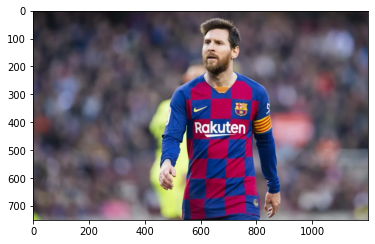

In [12]:
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3_rgb)

# Changing from BGR to HSV color space

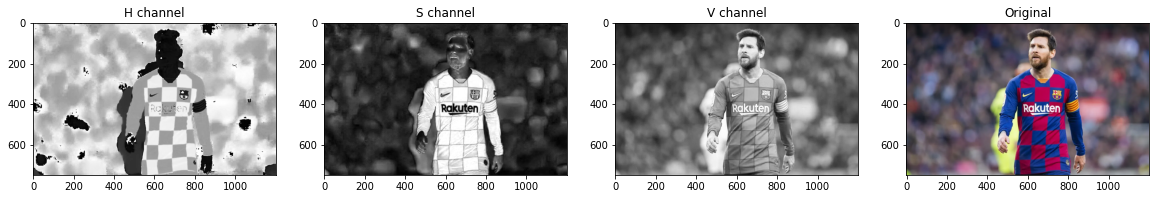

In [13]:
img3_hsv = cv2.cvtColor(img3, cv2.COLOR_BGR2HSV)

#split the image into HSV componenets
h, s, v = cv2.split(img3_hsv)

#show the channels
plt.figure(figsize=[20,5])
plt.subplot(141); plt.imshow(h, cmap='gray'); plt.title("H channel");
plt.subplot(142); plt.imshow(s, cmap='gray'); plt.title("S channel");
plt.subplot(143); plt.imshow(v, cmap='gray'); plt.title("V channel");
plt.subplot(144); plt.imshow(img3_rgb); plt.title("Original");

# Modifying individual channel

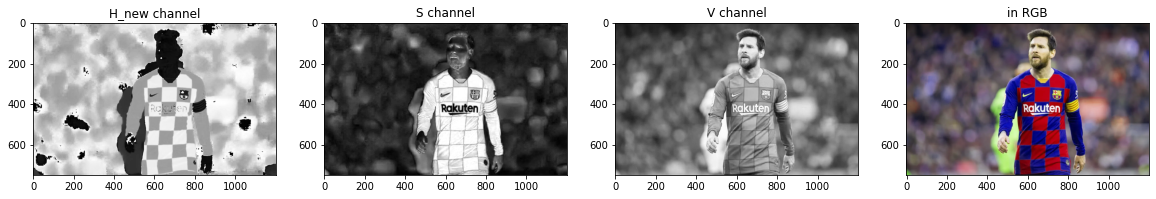

In [14]:
h_new = h+10
img3_hsv_merged = cv2.merge((h_new, s, v))
img3_rgb_new = cv2.cvtColor(img3_hsv_merged, cv2.COLOR_HSV2RGB)

#show the modified img
plt.figure(figsize=[20,5])
plt.subplot(141); plt.imshow(h_new, cmap='gray'); plt.title("H_new channel");
plt.subplot(142); plt.imshow(s, cmap='gray'); plt.title("S channel");
plt.subplot(143); plt.imshow(v, cmap='gray'); plt.title("V channel");
plt.subplot(144); plt.imshow(img3_rgb_new); plt.title("in RGB");

# Saving images
The image on input (as a png) is in RGB order but the image in memory (as a cv::Mat) is in BGR order. Use cv2. imread() for input. So, imread() will internally convert from rgb to bgr and imwrite() will do the opposite, all under the hood.

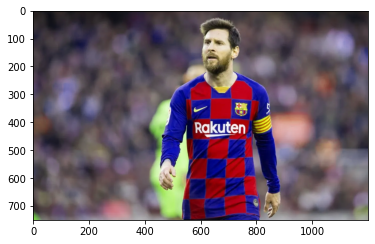

In [15]:
# save the image, The OpenCV function imwrite() that saves an image assumes that the order of colors is BGR,
cv2.imwrite("img3_new.png", img3_rgb_new)
img3_new = cv2.imread("img3_new.png", 1)
plt.imshow(img3_new)

# Also, we can use a window to display

In [16]:
window = cv2.namedWindow("window")

Alive = True
while Alive:
    cv2.imshow(window, img3)
    keypress = cv2.waitKey(1)
    if keypress == ord('q'):
        Alive = False
cv2.destroyWindow(window)

cv2.destroyAllWindows()
stop = 1